## Часть 2. Python + Визуализация

Дана выборка с информацией по студентам за первый квартал 2021 года (январь - март).
https://docs.google.com/spreadsheets/d/1yW2WNldqkug-iBTSFKhYT0aeN3zyczQRlMJIT-Qfi1E/
edit?usp=sharing
Выборка была сформирована 01.04.2021. Поэтому при выполнении задания мы
представляем, что за окном апрель 2021 года, следовательно, стоит учитывать, что не все
студенты успели пройти первый модуль обучения!
Столбец «М2» содержит информацию о присутствии того или иного студента на втором
модуле обучения (1 - присутствовал, 0 - не присутствовал). В таблицу гарантированно
попадают только те студенты, которые прошли хотя бы одно занятие, то есть присутствовали
на первом модуле обучения. Один модуль обучения длится 4 недели. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
from scipy import stats
import statsmodels as sts 

### 1. 
Провести предобработку данных. Особое внимание следует уделить столбцам «age» и «Дата первого занятия». 

In [2]:
df = pd.read_excel('Выборка для тестового задания.xlsx')
df

,id,age,Дата первого занятия,Курс,М2
0,2538,11.0,2021-02-28,Unity,0
1,2615,12.0,2021-02-14,Unity,0
2,2643,14.0,2021-02-21,Веб-дизайн,1
3,2968,11.0,2021-01-24,Python Базовый,0
4,3014,15.0,2021-03-14,Веб-дизайн,1
...,...,...,...,...,...
2167,19613,13.0,2021-03-28,Python Базовый,0
2168,19630,12.0,2021-03-28,Python Базовый,0
2169,19746,14.0,2021-03-28,Unity,0
2170,19768,15.0,2021-03-28,Веб-дизайн,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2172 entries, 0 to 2171
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    2172 non-null   int64         
 1   age                   2022 non-null   float64       
 2   Дата первого занятия  2172 non-null   datetime64[ns]
 3   Курс                  2172 non-null   object        
 4   М2                    2172 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 85.0+ KB


Видим, что в столбце "возраст" есть пропущенные данные, избавимся от строк с пропусками (к счастью, их немного). Поскольку от нас требуется проанализировать лишь тех учеников, которые полностью завершили 1-ый модуль, который длится месяц, мы отсечем все строчки с датой старта равной или более поздней, чем 1 марта 2021 года.

In [4]:
df_2 = df.dropna()
df_2 = df_2[df_2['Дата первого занятия'] < '2021-03-01']
df_2

,id,age,Дата первого занятия,Курс,М2
0,2538,11.0,2021-02-28,Unity,0
1,2615,12.0,2021-02-14,Unity,0
2,2643,14.0,2021-02-21,Веб-дизайн,1
3,2968,11.0,2021-01-24,Python Базовый,0
5,3121,15.0,2021-01-10,Unity,0
...,...,...,...,...,...
1254,16130,13.0,2021-02-28,Python Базовый,1
1257,16143,14.0,2021-02-28,Python Базовый,1
1263,16157,16.0,2021-02-28,Python Базовый,1
1270,16185,14.0,2021-02-28,Python Базовый,1


### 2. 
Учебный отдел обратился с просьбой о создании аналитического отчёта. Необходимо предоставить график по оттоку учеников в разрезе 3х курсов: Python Базовый, Веб-дизайн и Unity. Нас интересует отток только при переходе с первого модуля обучения на второй. Результатом отчёта будет являться график, состоящий из столбчатых диаграмм. Ось OX - курсы, OY - количество учеников. Столбцов на графике должно быть минимум 6 (по 2 на каждый курс). В первых столбах каждого курса - количество учеников на первом модуле, во вторых столбцах - количество учеников на втором модуле. Также необходимо добавить дополнительную ось OY с ломаной линией для наглядного представления доли оттока. Например, по курсу Python Базовый на первом модуле было 100 учеников, на втором модуле осталось 60, следовательно, доля оттока составляет 40%. Помимо графика предоставьте короткий письменный вывод о результатах проведённого исследования. 

Добавим единичный столбец М1, свидетельствующий о завершенном 1-м модуле. И ниже агрегируем информацию по курсам, добавим также переменную "Отток", измеренную в %.

In [5]:
df_2['М1'] = 1
df_2

,id,age,Дата первого занятия,Курс,М2,М1
0,2538,11.0,2021-02-28,Unity,0,1
1,2615,12.0,2021-02-14,Unity,0,1
2,2643,14.0,2021-02-21,Веб-дизайн,1,1
3,2968,11.0,2021-01-24,Python Базовый,0,1
5,3121,15.0,2021-01-10,Unity,0,1
...,...,...,...,...,...,...
1254,16130,13.0,2021-02-28,Python Базовый,1,1
1257,16143,14.0,2021-02-28,Python Базовый,1,1
1263,16157,16.0,2021-02-28,Python Базовый,1,1
1270,16185,14.0,2021-02-28,Python Базовый,1,1


In [6]:
df_3 = df_2.groupby('Курс').agg( {'М1': 'sum', 'М2': 'sum'} )
df_3['Отток'] = (df_3['М1'] - df_3['М2']) / df_3['М1'] * 100
df_3['Отток'] = df_3['Отток'].apply(round)
df_3

,М1,М2,Отток
Курс,,,
Python Базовый,751,353,53
Unity,58,23,60
Веб-дизайн,234,129,45


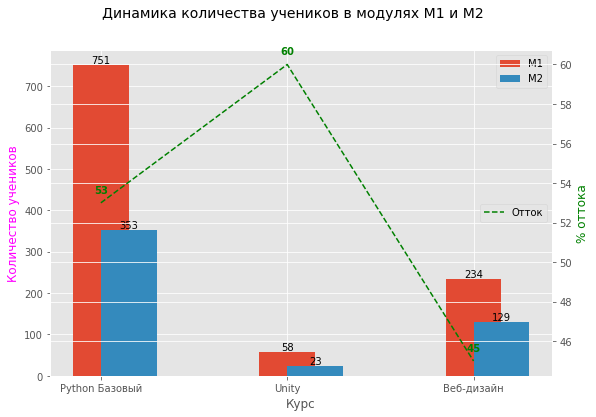

In [7]:
fig, ax1 = plt.subplots(figsize=(9,6))
fig.suptitle('Динамика количества учеников в модулях М1 и М2', fontsize=14)

bar1 = ax1.bar(df_3.index, df_3['М1'], width=0.3, label = 'М1')
bar2 = ax1.bar(df_3.index, df_3['М2'], width=0.3, align='edge', label = 'М2')

for rect in bar1 + bar2:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, height, ha='center', va='bottom')
    
ax2 = ax1.twinx()
ax2.plot(df_3.index, df_3['Отток'], 'g--', label = 'Отток')

for x,y in zip([rect.get_x() + rect.get_width()/2.0 for rect in bar1], df_3['Отток']):
    label = y
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center',
                 color='green', 
                 weight='bold') # horizontal alignment can be left, right or center

ax1.set_xlabel('Курс')
ax1.set_ylabel('Количество учеников', color='magenta')
ax2.set_ylabel('% оттока', color='green')
ax1.legend(loc = 'upper right')
ax2.legend(loc = 'center right')
plt.show()

Как мы видим, отток на разных курсах колеблется примерно в районе 50 %, что в любом случае составляет значительную величину, - если коэффициент оттока останется на таком уровне, то уже задолго до 8 модуля придется массово расформировывать группы. Соответственно, как минимум стоило бы путем опроса тех, кто ушел после 1-го модуля установить причины оттока, упорядочив которые по частоте встречаемости можно было бы сделать выводы и внести соответствующие корректировки.

### 3. (Дополнительное задание)
Также учебному отделу хочется увидеть динамику оттока курса Python Базовый по
возрастам, чтобы чётко определить верхние и нижние границы возраста при
формировании новых групп обучения. Существует гипотеза, что дети младше 12 и старше
14 лет чаще переходят в отток. Для того, чтобы принять или опровергнуть гипотезу,
необходимо предоставить наглядные данные в виде столбчатых диаграмм (как в первом
задании). Ось OX - возраста в порядке возрастания, ось OY - количество учеников.
Первые столбцы для каждого возраста - количество учеников на первом модуле обучения,
вторые столбцы для каждого возраста - количество учеников на втором модуле обучения.
Также необходимо добавить дополнительную ось OY с ломаной линией для наглядного
представления доли оттока. Например, на первом модуле обучения в возрасте 10 лет было
20 учеников, на втором модуле осталось 15, следовательно, доля оттока составляет 25%.
Помимо графика предоставьте короткий письменный вывод о результатах проведённого
исследования. 

Отфильтруем строки таблицы таким образом, чтобы остались лишь ученики с курсом "Python Базовый" и далее проведем те же действия, что мы проводили ранее в задании 2.

In [8]:
df_4 = df_2[df_2['Курс'] == 'Python Базовый']
df_4

,id,age,Дата первого занятия,Курс,М2,М1
3,2968,11.0,2021-01-24,Python Базовый,0,1
15,6822,10.0,2021-02-21,Python Базовый,1,1
23,8625,13.0,2021-02-07,Python Базовый,1,1
24,8784,13.0,2021-01-10,Python Базовый,0,1
25,8809,14.0,2021-01-10,Python Базовый,0,1
...,...,...,...,...,...,...
1254,16130,13.0,2021-02-28,Python Базовый,1,1
1257,16143,14.0,2021-02-28,Python Базовый,1,1
1263,16157,16.0,2021-02-28,Python Базовый,1,1
1270,16185,14.0,2021-02-28,Python Базовый,1,1


In [9]:
df_5 = df_4.groupby('age').agg( {'М1': 'sum', 'М2': 'sum'} )
df_5['Отток'] = (df_5['М1'] - df_5['М2']) / df_5['М1'] * 100
df_5['Отток'] = df_5['Отток'].apply(round)
df_5.sort_index(inplace=True)
df_5

,М1,М2,Отток
age,,,
8.0,2,0,100
9.0,2,2,0
10.0,21,11,48
11.0,91,42,54
12.0,232,99,57
13.0,192,99,48
14.0,128,59,54
15.0,62,31,50
16.0,17,9,47


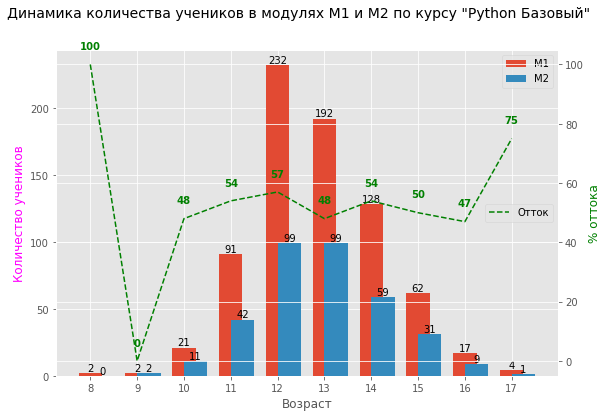

In [10]:
fig, ax1 = plt.subplots(figsize=(9,6))
fig.suptitle('Динамика количества учеников в модулях М1 и М2 по курсу "Python Базовый"', fontsize=14)

width = 0.5

bar1 = ax1.bar(df_5.index, df_5['М1'], width=width, label = 'М1')
bar2 = ax1.bar(df_5.index, df_5['М2'], width=width, align='edge', label = 'М2')
ax1.set_xticks(df_5.index)

for rect in bar1 + bar2:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, height, ha='center', va='bottom')

ax2 = ax1.twinx()
ax2.plot(df_5.index, df_5['Отток'], 'g--', label = 'Отток')

for x,y in zip([rect.get_x() + rect.get_width()/2.0 for rect in bar1], df_5['Отток']):
    label = y
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,15), # distance from text to points (x,y)
                 ha='center', 
                 color='green', 
                 weight='bold') # horizontal alignment can be left, right or center

ax1.set_xlabel('Возраст')
ax1.set_ylabel('Количество учеников', color='magenta')
ax2.set_ylabel('% оттока', color='green')
ax1.legend(loc = 'upper right')
ax2.legend(loc = 'center right')
plt.show()

Если не принимать в рассмотрение 8 летних детей, которых было лишь двое, то по графику едва ли можно сделать вывод о том, что дети до 12 лет и старше 14 лет чаще уходят в отток. Посмотрим более пристально на эти две группы учеников, для этого группу учеников до 12 и после 14 лет пометим единичкой в столбце is_outflow.

In [11]:
df_6 = df_5
df_6['age'] = df_6.index
df_6['age'] = df_6['age'].astype('int64')
df_6['is_outflow'] = df_6['age'].apply(lambda x: 1 if (x < 12 or x > 14) else 0)
df_6

,М1,М2,Отток,age,is_outflow
age,,,,,
8.0,2,0,100,8,1
9.0,2,2,0,9,1
10.0,21,11,48,10,1
11.0,91,42,54,11,1
12.0,232,99,57,12,0
13.0,192,99,48,13,0
14.0,128,59,54,14,0
15.0,62,31,50,15,1
16.0,17,9,47,16,1


In [12]:
df_7 = df_6.groupby('is_outflow').agg( {'М1': 'sum', 'М2': 'sum'} )
df_7['Отток'] = (df_7['М1'] - df_7['М2']) / df_7['М1']
df_7['Оставшиеся ученики'] =  df_7['М2'] / df_7['М1']
df_7

,М1,М2,Отток,Оставшиеся ученики
is_outflow,,,,
0,552,257,0.534420,0.465580
1,199,96,0.517588,0.482412


Сгруппировав информацию по обеим группам учеников мы не видим значимого отличия в оттоке между группами, более того, в группе с "крайними возрастами" отток получился даже чуть меньше. Проверим гипотезу о равенстве долей по оттоку в двух группах, возьмем для этого доли по оставшимся ученикам.

Проверка гипотезы о равенстве долей. Выборки независимые. 

$$
\begin{aligned}
&H_0: \hspace{2mm} p_1 = p_2 \hspace{2mm} \text{В обеих группах одинаковый % оттока} \\
&H_1: \hspace{2mm} p_1 \ne p_2  \hspace{2mm} \text{Есть различия в оттоке между двумя группами}
\end{aligned}
$$

> **Предпосылки:** нет выбросов, много наблюдений. Наблюдения независимы. Тогда сможем использовать ЦПТ.

In [13]:
alpha = 0.05                                                                    # уровень значимости = 5%
n1,n2 = df_7.loc[0, 'М1'], df_7.loc[1, 'М1']                                    # размеры выборок
m1,m2 = df_7.loc[0, 'М2'], df_7.loc[1, 'М2']                                    # число успехов

p1, p2 = df_7.loc[0, 'Оставшиеся ученики'], df_7.loc[1, 'Оставшиеся ученики']   # точечные оценки долей 
diff = p1 - p2                                                                  # разность долей

P = (m1 + m2)/(n1 + n2)          
diff_std = np.sqrt(P*(1 - P)*(1/n1 + 1/n2))                                     # стандартное отклонение разности
                                    
z_obs = diff/diff_std                                                           # наблюдаемое значение статистики 
z_crit = stats.norm.ppf(1 - alpha/2)                                            # критическое значение статистики

print(f'{z_obs:.3} попадает в ({-z_crit:.3} , {z_crit:.3}) => Нулевая гипотеза не отвергается')

-0.408 попадает в (-1.96 , 1.96) => Нулевая гипотеза не отвергается


Как видим с 5% уровнем значимости гипотеза о том, что отток одинаков в двух группах учеников не отвергается, тем более не отвергаться она будет при 1% уровне значимости. 

Таким образом на имеющихся данных **гипотеза, что дети младше 12 и старше 14 лет чаще переходят в отток не подтверждается**.